**FUZZY LOGIC - IMAGE**

**Install packages**

In [1]:
# installation of the libraries used in this work
!pip install scikit-fuzzy -q
!pip install gdal -q
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 53.7 MB/s eta 0:00:00


**Import packages**

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import collections
import cv2
from osgeo import gdal, osr
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# access to the data folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


** Read data**

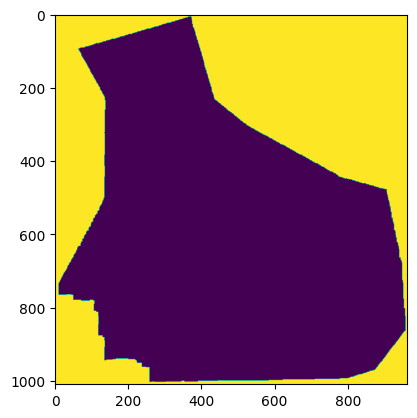

In [ ]:
#Gravimetric

# Open image
bouguer1 = gdal.Open ('/content/drive/MyDrive/projeto_bacia_paraná/bacia_completa/Bouguer.tif', gdal.GA_ReadOnly)

# Get transformed
GT_entrada = bouguer1.GetGeoTransform()

# Get bandwidth
bouguer2 = bouguer1.GetRasterBand(1)

# Get the image matrix
bouguer_array = bouguer2.ReadAsArray()

#Plot
plt.figure()
plt.imshow(bouguer_array)

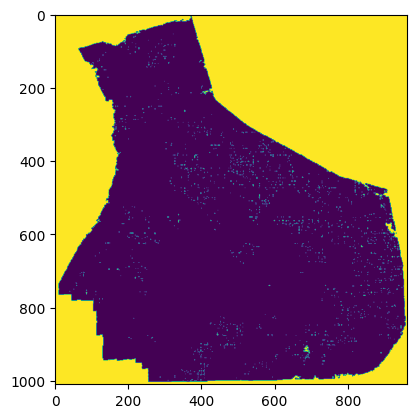

In [ ]:
#Geologico

#Abrir imagem
geol1 = gdal.Open ('/content/drive/MyDrive/projeto_bacia_paraná/bacia_completa/GeologyRock.tif', gdal.GA_ReadOnly)

#Obter banda
geol2 = geol1.GetRasterBand(1)

#Obter matriz da imagem
geol_array = geol2.ReadAsArray()

#Plotar
plt.figure()
plt.imshow(geol_array)

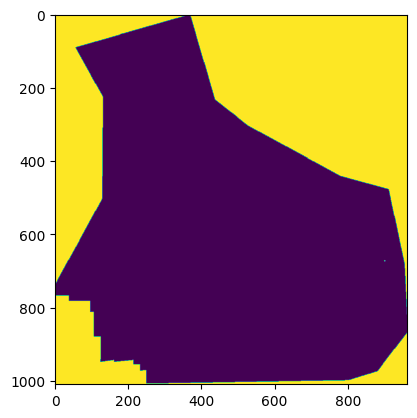

In [ ]:
#Termal

#Abrir imagem
heatflow1 = gdal.Open ('/content/drive/MyDrive/projeto_bacia_paraná/bacia_completa/HeatFlow.tif', gdal.GA_ReadOnly)

#Obter banda
heatflow2 = heatflow1.GetRasterBand(1)

#Obter matriz da imagem
heatflow_array = heatflow2.ReadAsArray()

#Plotar
plt.figure()
plt.imshow(heatflow_array)

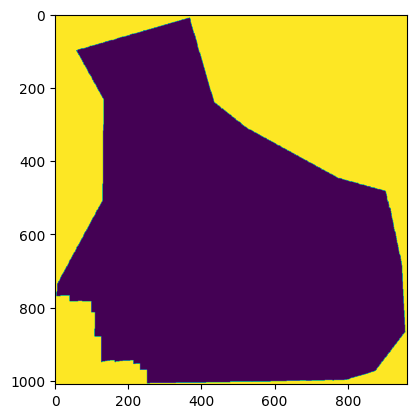

In [ ]:
#Falha

#Abrir imagem
fault1 = gdal.Open ('/content/drive/MyDrive/projeto_bacia_paraná/bacia_completa/DistancetoFaults.tif', gdal.GA_ReadOnly)

#Obter banda
fault2 = fault1.GetRasterBand(1)

#Obter matriz da imagem
fault_array = fault2.ReadAsArray()

#Plotar
plt.figure()
plt.imshow(fault_array)

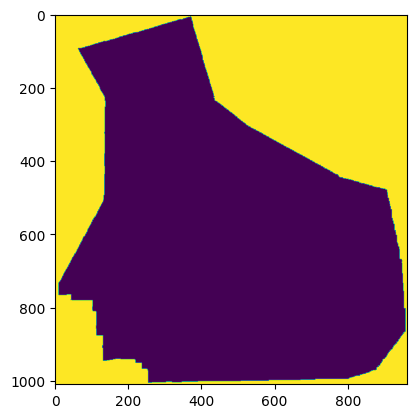

In [ ]:
#Magnetico

#Abrir imagem
mag1 = gdal.Open ('/content/drive/MyDrive/projeto_bacia_paraná/bacia_completa/MageneticAnomaly.tif', gdal.GA_ReadOnly)

#Obter banda
mag2 = mag1.GetRasterBand(1)

#Obter matriz da imagem
mag_array = mag2.ReadAsArray()

#Plotar
plt.figure()
plt.imshow(mag_array)


In [ ]:
mag_array

array([[9999, 9999, 9999, ..., 9999, 9999, 9999],
       [9999, 9999, 9999, ..., 9999, 9999, 9999],
       [9999, 9999, 9999, ..., 9999, 9999, 9999],
       ...,
       [9999, 9999, 9999, ..., 9999, 9999, 9999],
       [9999, 9999, 9999, ..., 9999, 9999, 9999],
       [9999, 9999, 9999, ..., 9999, 9999, 9999]], dtype=uint16)

In [ ]:
# Creating problem variables

# Antecent --> defines the range of values that the input variable can take on
mcda_rock = ctrl.Antecedent(np.arange(0, 6, 1), 'fuzzy_rock')
mcda_grav = ctrl.Antecedent(np.arange(0, 6, 1), 'fuzzy_grav')
mcda_mag = ctrl.Antecedent(np.arange(0, 6, 1), 'fuzzy_mag')
mcda_faults = ctrl.Antecedent(np.arange(0, 6, 1), 'fuzzy_faults')
mcda_heatflow = ctrl.Antecedent(np.arange(0, 6, 1), 'fuzzy_heatflow')

In [ ]:
#consequent --> defines the range of values that the input variable can take on
geothermal_potential = ctrl.Consequent(np.arange(0, 6, 1), 'geothermal_potential')

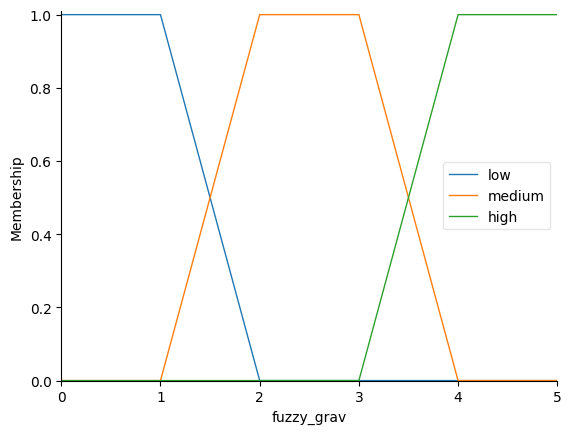

In [ ]:
mcda_grav['low'] = fuzz.trapmf(mcda_grav.universe, [0, 0, 1, 2])
mcda_grav['medium'] = fuzz.trapmf(mcda_grav.universe, [1, 2, 3, 4])
mcda_grav['high'] = fuzz.trapmf(mcda_grav.universe, [3, 4, 5, 5])
mcda_grav.view()

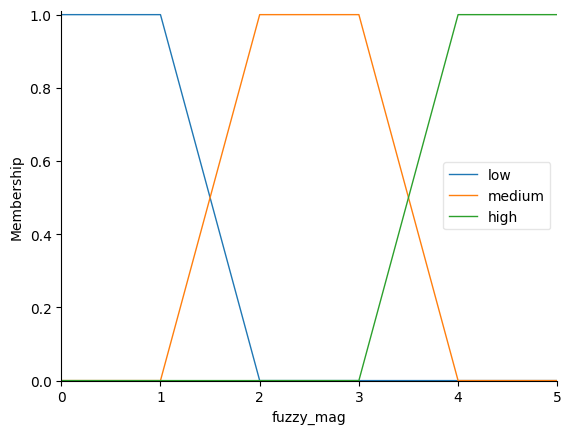

In [ ]:
mcda_mag['low'] = fuzz.trapmf(mcda_mag.universe, [0, 0, 1, 2])
mcda_mag['medium'] = fuzz.trapmf(mcda_mag.universe, [1, 2, 3, 4])
mcda_mag['high'] = fuzz.trapmf(mcda_mag.universe, [3, 4, 5, 5])
mcda_mag.view()

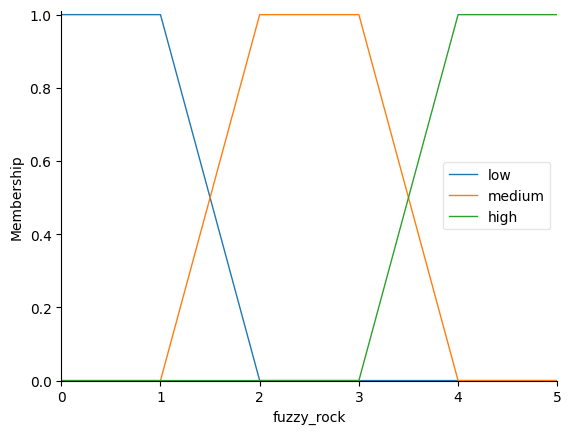

In [ ]:
mcda_rock['low'] = fuzz.trapmf(mcda_rock.universe, [0, 0, 1, 2])
mcda_rock['medium'] = fuzz.trapmf(mcda_rock.universe, [1, 2, 3, 4])
mcda_rock['high'] = fuzz.trapmf(mcda_rock.universe, [3, 4, 5, 5])
mcda_rock.view()

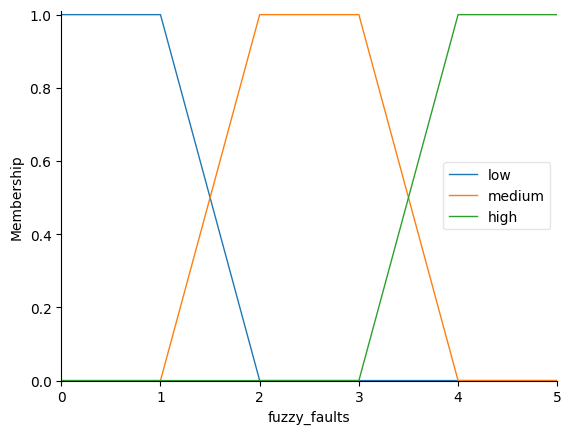

In [ ]:
mcda_faults['low'] = fuzz.trapmf(mcda_faults.universe, [0, 0, 1, 2])
mcda_faults['medium'] = fuzz.trapmf(mcda_faults.universe, [1, 2, 3, 4])
mcda_faults['high'] = fuzz.trapmf(mcda_faults.universe, [3, 4, 5, 5])
mcda_faults.view()

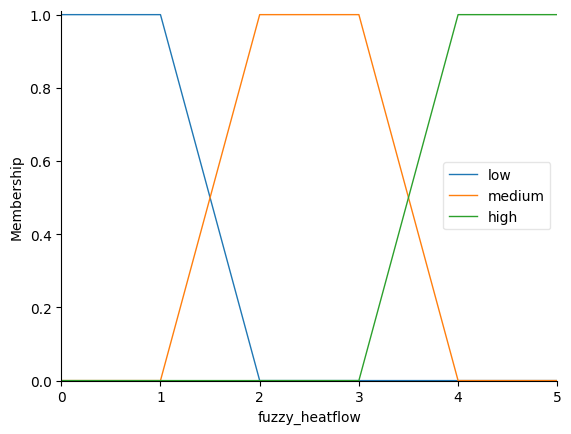

In [ ]:
mcda_heatflow['low'] = fuzz.trapmf(mcda_heatflow.universe, [0, 0, 1, 2])
mcda_heatflow['medium'] = fuzz.trapmf(mcda_heatflow.universe, [1, 2, 3, 4])
mcda_heatflow['high'] = fuzz.trapmf(mcda_heatflow.universe, [3, 4, 5, 5])
mcda_heatflow.view()

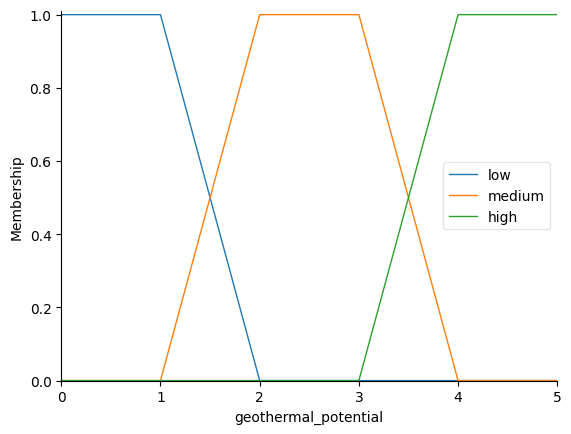

In [ ]:
# Define membership functions for the consequent
geothermal_potential['low'] = fuzz.trapmf(geothermal_potential.universe, [0, 0, 1, 2])
geothermal_potential['medium'] = fuzz.trapmf(geothermal_potential.universe, [1, 2, 3, 4])
geothermal_potential['high'] = fuzz.trapmf(geothermal_potential.universe,  [3, 4, 5, 5])
geothermal_potential.view()

**Rules**

In [ ]:
# rules
rule1 = ctrl.Rule(mcda_grav['low'] & mcda_mag['low'] & mcda_faults['low']  & mcda_heatflow['low'] & mcda_rock['low'], geothermal_potential['low'])

rule2 = ctrl.Rule(mcda_grav['medium'] & mcda_mag['medium'] & mcda_faults['medium'] | mcda_heatflow['medium'] | mcda_rock['medium'], geothermal_potential['medium'])

rule3 = ctrl.Rule(mcda_grav['high'] & mcda_mag['high'] & mcda_faults['high'] | mcda_heatflow['high'] & mcda_rock['high'],  geothermal_potential['high'])

rule4 = ctrl.Rule(mcda_grav['high'] & mcda_mag['medium'] & mcda_faults['high'] & mcda_rock['high'] | mcda_heatflow['medium'],  geothermal_potential['high'])

rule5 = ctrl.Rule(mcda_grav['high'] & mcda_mag['low'] & mcda_faults['high'] & mcda_rock['high'] & mcda_heatflow['medium'],  geothermal_potential['medium'])

rule6 = ctrl.Rule(mcda_grav['medium'] & mcda_mag['high'] & mcda_faults['high'] & mcda_rock['low'] & mcda_heatflow['high'],  geothermal_potential['medium'])

rule7 = ctrl.Rule(mcda_grav['high'] & mcda_mag['low'] & mcda_faults['medium'] & mcda_rock['high'] | mcda_heatflow['high'],  geothermal_potential['medium'])

rule8 = ctrl.Rule(mcda_grav['low'] | mcda_mag['medium'] & mcda_faults['low'] | mcda_rock['medium'] | mcda_heatflow['low'],  geothermal_potential['low'])

rule9 = ctrl.Rule(mcda_grav['low'] & mcda_mag['medium'] | mcda_heatflow['low'] & mcda_faults['low'] & mcda_rock['medium'], geothermal_potential['low'])

rule10 = ctrl.Rule(mcda_grav['medium'] & mcda_mag['high'] & mcda_faults['low'] & mcda_heatflow['medium'] | mcda_rock['low'], geothermal_potential['low'])

**Fuzzy Systems and Simulation**

In [ ]:
# Control system for rules and simulation
geopotential_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
geopotential_simulador = ctrl.ControlSystemSimulation(geopotential_ctrl)

# Create a matrix of zeros with the dimension of the reference image
geotermic_array = np.zeros((geol_array.shape[0], geol_array.shape[1]))

In [ ]:
# Inputs --> pixel values
for i in range(0, 1010):
  for j in range(0, 963):
    #print(i,j)
    if (geol_array[i][j] == 9999) or (bouguer_array[i][j] == 9999) or (mag_array[i][j] == 9999) or (fault_array[i][j] == 9999) or (heatflow_array[i][j] == 9999):
      #Check if it's NaN
      geotermic_array[i][j] = 0
    else:
      geopotential_simulador.input['fuzzy_rock'] = geol_array[i][j]
      geopotential_simulador.input['fuzzy_grav'] = bouguer_array[i][j]
      geopotential_simulador.input['fuzzy_mag'] = mag_array[i][j]
      geopotential_simulador.input['fuzzy_faults'] = fault_array[i][j]
      geopotential_simulador.input['fuzzy_heatflow'] = heatflow_array[i][j]
      geopotential_simulador.compute()
      geotermic_array[i][j] = geopotential_simulador.output['geothermal_potential']



In [ ]:
print(geotermic_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Generate image with prediction**

In [ ]:
from osgeo import gdal, osr

#Parameters
no_of_bands = geotermic_array.shape[0]
height = geotermic_array.shape[0]
width = geotermic_array.shape[1]

#Generate and save image
driver = gdal.GetDriverByName("GTiff")
driver.Register()
outds = driver.Create("/content/fuzzy_geotermic_potential_01.tif", width, height, no_of_bands, gdal.GDT_Float32)

outds.SetGeoTransform(GT_entrada)
outds.SetProjection(bouguer1.GetProjection())
outband = outds.GetRasterBand(1)
outband.WriteArray(geotermic_array)
outband.SetNoDataValue(np.nan)
outband.FlushCache()


out_srs = osr.SpatialReference()
out_srs.ImportFromEPSG(4326)
outds.SetProjection(out_srs.ExportToWkt())
outds = None


**view image**

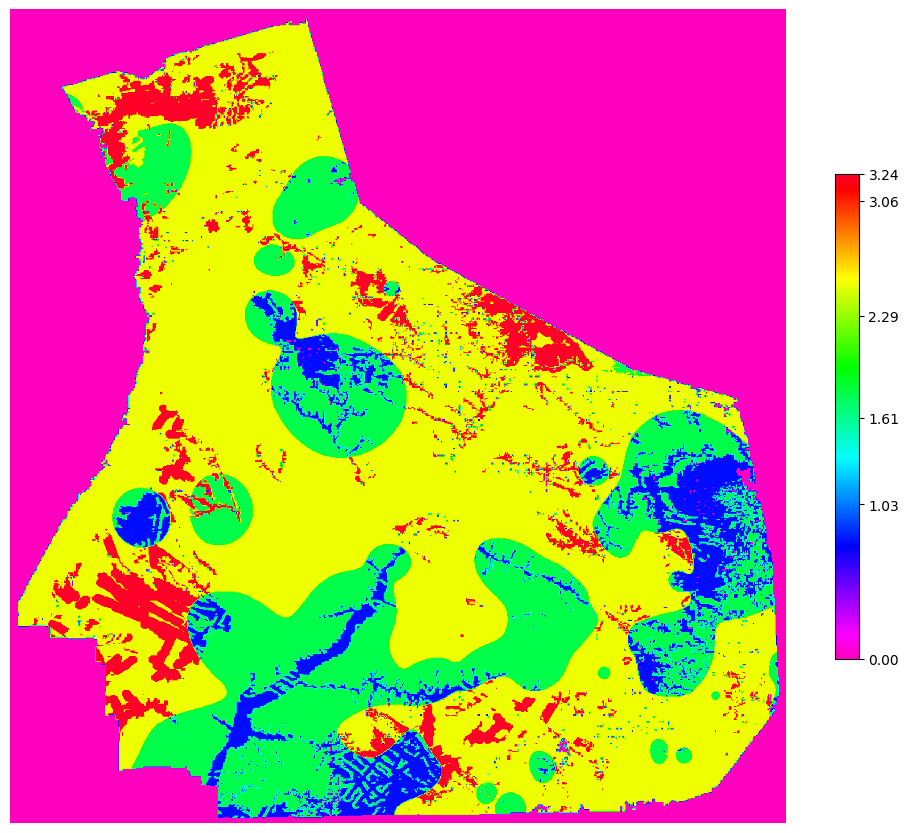

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the raster file
src = rasterio.open('/content/fuzzy_geotermic_potential_01.tif')

# Read raster data
raster_data = src.read(1)

# Plot the raster image
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='gist_rainbow_r')
plt.axis('off')

# Add color bar
cbar = plt.colorbar(shrink=0.5, orientation='vertical')
# Define specific legends for certain areas of the color bar
ticks = [0, 1.03,1.61, 2.29,3.06, 3.24]
tick_labels = ['Low', 'Medium', 'High']
cbar.set_ticks(ticks)
#cbar.set_ticklabels(tick_labels)

plt.tight_layout()

plt.show()
